# Taller 1 - Analítica computacional para la Toma de Decisione
## Esteban Ladino 

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import scipy as sp # type: ignore

### BikePrices

In [ ]:
df = pd.read_csv(".\\BikePrices.csv")
print(f"Dimensiones: {df.shape} \nCantidad de NaN: {df.isnull().sum().sum()}")
print(f"\tCantidad de NaN por columna: {list(df.isnull().sum())}")
df.head() 

In [ ]:
columnas_interes = ["Brand", "Model", "Seller_Type", "Owner"]
for columna in columnas_interes:
    print(f"Valores únicos en {columna}: {list(df[columna].unique())}")
# df["Owner"] = df["Owner"].map({"1st owner": 1, "2nd owner": 2, "3rd owner": 3, "4th owner": 4})

In [ ]:
Conteo_Brands = df["Brand"].value_counts()
plt.bar(Conteo_Brands.index, Conteo_Brands.values)
plt.xlabel("Marca")
plt.ylabel("Cantidad")
plt.xticks(rotation=65) 
plt.grid(axis="y")
plt.show()


In [ ]:
#plt.figure(figsize=(10, 8))

Conteo_Brands.plot(kind="pie", labels=[""]*20, title="") #, autopct='%1.1f%%') 
plt.legend(title="Marcas", loc="best", labels=Conteo_Brands.index, fontsize=7.5) 
plt.show()

In [ ]:
df.groupby("Brand")["Owner"].unique()
df.groupby("Brand")["Owner"].value_counts()

In [ ]:
owners = ["1st owner", "2nd owner", "3rd owner", "4th owner"]
valores = []
for o in owners:
    df[df["Owner"] == o].groupby("Brand").size()
    valores.append(df[df["Owner"] == o].groupby("Brand").size())

df_resultados = pd.DataFrame(valores, index=owners)

df_resultados.T.plot(kind="bar")
plt.title("Cantidad de vehículos por marca y propietario")
plt.xlabel("Marca")
plt.ylabel("Cantidad")
plt.legend(title="Propietario")



In [ ]:
df.boxplot(column=["Selling_Price", "Ex_Showroom_Price"])
plt.show()

### Números aleatorios y bondad de ajuste

In [9]:
import statsmodels.api as sm # type: ignore
import scipy.stats as stats # type: ignore
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import scipy as sp# type: ignore

In [ ]:
left = 2
right = 25
mode = 10

Numeros = np.random.triangular(left=left, mode=mode, right=right, size=1000)
df = pd.DataFrame(Numeros)
Descrip = df.describe() 
print(Descrip)

In [ ]:
plt.hist(x=Numeros)
#plt.grid(True)
plt.title('Histograma de tiempos de servicio')
plt.xlabel('Tiempos de servicio')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Minim = Descrip.loc["min"][0]
Maxim = Descrip.loc["max"][0]
Modam = df.mode(axis="columns").iloc[0][0]

x = np.linspace(Minim, Maxim, 1000) 
print(Minim, Modam, Maxim)


In [ ]:
from scipy.stats import triang # type: ignore
Minim = Descrip.loc["min"][0]
Maxim = Descrip.loc["max"][0]
x = np.arange(left,right,0.001)

c = (mode - left) / (right - left)  
loc = left                         
scale = right - left               

plt.plot(x, triang.pdf(x, c, loc=loc, scale=scale), label="PDF")
plt.title('Función de densidad ')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.show()

In [ ]:
sm.qqplot(Numeros, dist=stats.triang(c, loc=loc, scale=scale), line="45")
plt.show()

In [ ]:

plt.hist(x=Numeros, density=True)
plt.plot(x, triang.pdf(x, c, loc=loc, scale=scale), label="PDF")
plt.title('Tiempos de servicio')
plt.xlabel('Tiempos de servicio')
plt.ylabel('Frecuencia')
plt.show()

# Modificaciones para taller 2

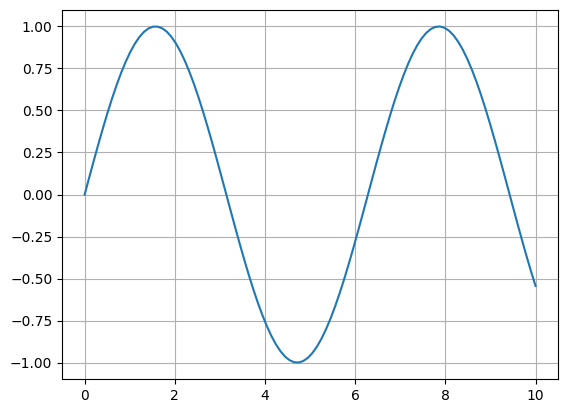

In [4]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import scipy as sp # type: ignore

x = np.linspace(0, 10, 100)  
y = np.sin(x)

plt.plot(x, y)
plt.grid(True)
plt.show()